In [2]:
import sys
!{sys.executable} -m pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 3.0 MB/s  0:00:03a 0:00:010:00:0102
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]━━━━━━━━━━━ 2/3 [pandas]


In [3]:
import pandas as pd

df = pd.read_csv("data/DisneylandReviews.csv", encoding="utf-8", encoding_errors="replace")
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
df1 = df.rename(columns={
    "Year_Month": "time",
    "Reviewer_Location": "location",
    "Review_Text": "text",
})
df1.head()

,Review_ID,Rating,time,location,text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review_ID  42656 non-null  int64 
 1   Rating     42656 non-null  int64 
 2   time       42656 non-null  object
 3   location   42656 non-null  object
 4   text       42656 non-null  object
 5   Branch     42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [6]:
df1["Branch"].unique()

array(['Disneyland_HongKong', 'Disneyland_California', 'Disneyland_Paris'],
      dtype=object)

In [7]:
df_hk = df1[df1["Branch"] == "Disneyland_HongKong"]
df_ca = df1[df1["Branch"] == "Disneyland_California"]
df_pa = df1[df1["Branch"] == "Disneyland_Paris"]

In [8]:
df_ca.head()

,Review_ID,Rating,time,location,text,Branch
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California
9622,670565072,4,2019-5,Australia,All and all a great day was had. The crowds ar...,Disneyland_California
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California


Wordcloud

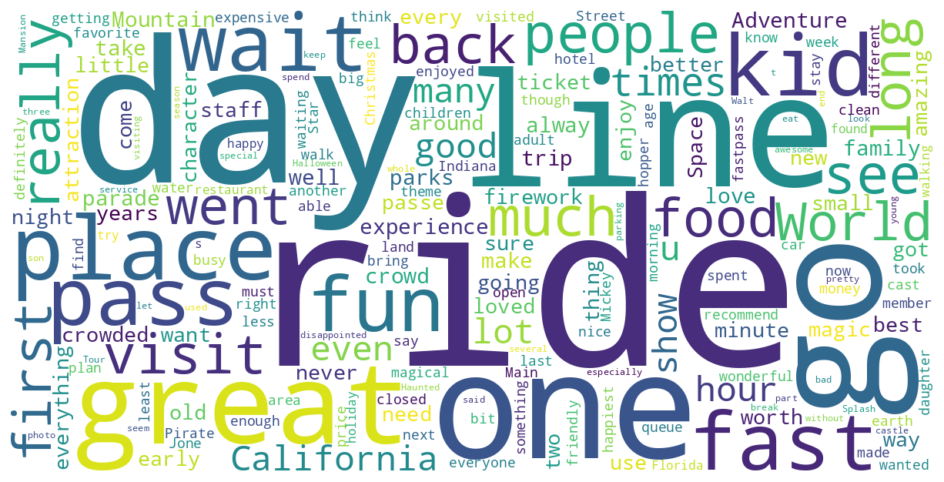

In [9]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(df_ca["text"].dropna().astype(str))

custom_stopwords = {"time", "park", "disneyland", "disney", "still", 'will', 'year'}  
all_stopwords = STOPWORDS.union(custom_stopwords)

wc = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    stopwords=all_stopwords,
    collocations=False
).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


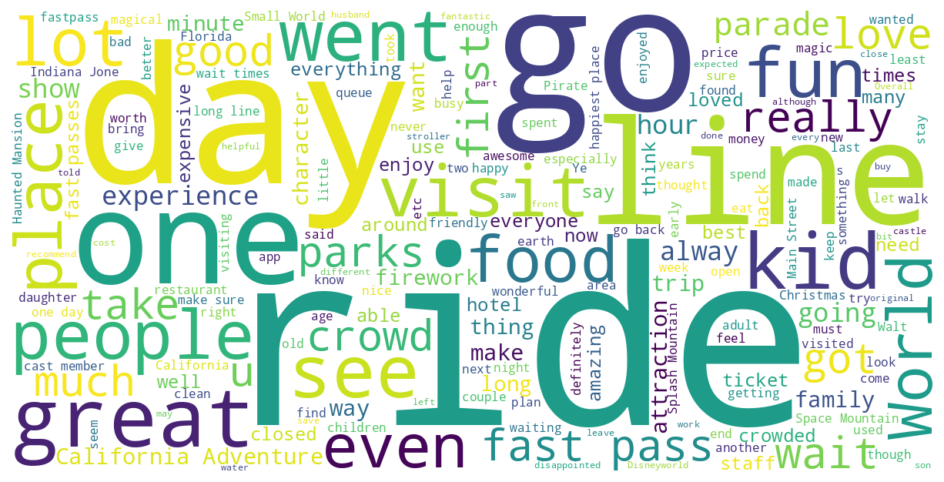

In [10]:
wc = WordCloud(
    width=1200, height=600,
    background_color="white",
    stopwords=all_stopwords,
    collocations=True   # phrases
).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


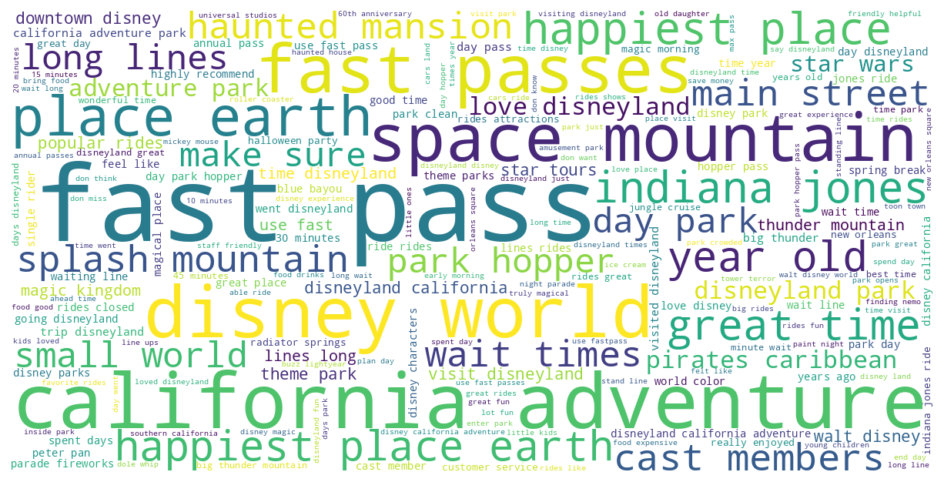

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

texts = df_ca["text"].dropna().astype(str)

vec = CountVectorizer(stop_words="english", ngram_range=(2, 3), min_df=3)
X = vec.fit_transform(texts)

counts = X.sum(axis=0).A1
phrases = vec.get_feature_names_out()

freq = dict(zip(phrases, counts))

wc = WordCloud(width=1200, height=600, background_color="white").generate_from_frequencies(freq)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


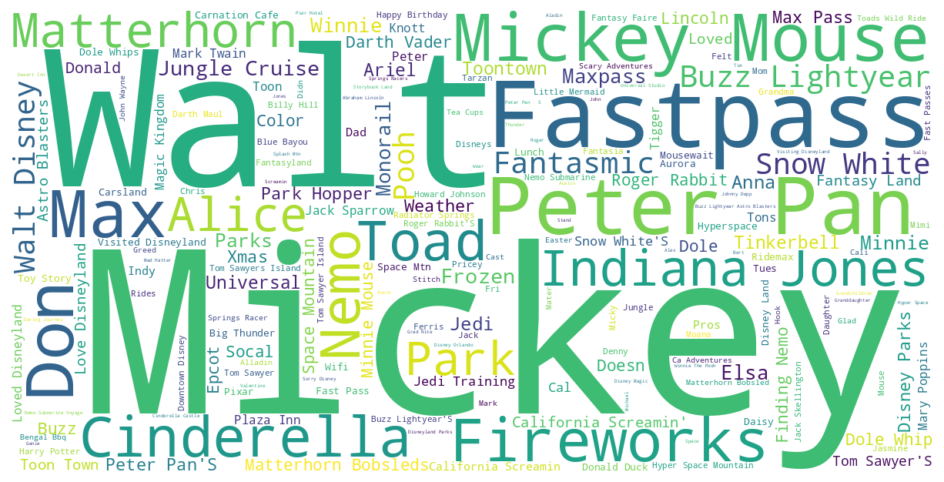

In [14]:
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

texts = df_ca["text"].dropna().astype(str)

counts = Counter()
for doc in nlp.pipe(texts, batch_size=50):
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            counts[ent.text.strip().title()] += 1

# Optional: remove common false positives
exclude = {"Disney", "Disneyland"}
counts = Counter({k:v for k,v in counts.items() if k not in exclude and len(k) > 2})

wc = WordCloud(width=1200, height=600, background_color="white").generate_from_frequencies(counts)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [15]:
texts = df_ca["text"].dropna().astype(str)

vec = CountVectorizer(
    stop_words="english",
    ngram_range=(2, 3),   # 2- to 3-word groups
    min_df=3              # appear in at least 3 reviews (tweak)
)
X = vec.fit_transform(texts)

counts = X.sum(axis=0).A1
ngrams = vec.get_feature_names_out()

top = sorted(zip(counts, ngrams), reverse=True)[:30]

pd.DataFrame(top, columns=["count", "phrase"])


,count,phrase
0,3151,fast pass
1,2326,california adventure
2,1977,disney world
3,1711,fast passes
4,1664,space mountain
5,1478,place earth
6,1383,happiest place
7,1371,indiana jones
8,1331,great time
9,1308,happiest place earth


rating & text sentiment

In [18]:
!{sys.executable} -m pip -q install nltk

In [19]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gama/nltk_data...


True

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df_ca1 = df_ca.copy()
df_ca1["text"] = df_ca1["text"].fillna("").astype(str)
df_ca1["Rating"] = pd.to_numeric(df_ca1["Rating"], errors="coerce")
df_ca1["sentiment"] = df_ca1["text"].apply(lambda t: sia.polarity_scores(t)["compound"])  # -1..+1
df_ca1[["text","sentiment"]].head()

,text,sentiment
9620,This place has always been and forever will be...,0.9008
9621,A great day of simple fun and thrills. Bring c...,0.9595
9622,All and all a great day was had. The crowds ar...,0.7319
9623,Having been to the Florida location numerous t...,0.9458
9624,"Had the 4 day pass, spent 3 at DL and one at C...",0.0572


In [23]:
import re

aspect_keywords = {
    "ride_area": [
        r"\bride(s)?\b", r"\battraction(s)?\b", r"\broller coaster\b", r"\bparade\b", r"\bshow\b",
        r"\bland\b", r"\barea\b"
    ],
    "food_outlets": [
        r"\bfood\b", r"\brestaurant\b", r"\bcafe\b", r"\bsnack(s)?\b", r"\bmeal(s)?\b",
        r"\bdining\b", r"\bmenu\b", r"\bdrink(s)?\b"
    ],
    "staff": [
        r"\bstaff\b", r"\bemployee(s)?\b", r"\bcast member(s)?\b", r"\bteam\b",
        r"\brude\b", r"\bfriendly\b", r"\bhelpful\b"
    ],
    "cleanliness": [
        r"\bclean\b", r"\bdirty\b", r"\btrash\b", r"\brestroom(s)?\b", r"\bbathroom(s)?\b",
        r"\bgross\b", r"\bsanitary\b"
    ],
    "value_for_money": [
        r"\bprice\b", r"\bcost\b", r"\bexpensive\b", r"\bcheap\b", r"\bvalue\b", r"\bworth\b",
        r"\boverpriced\b", r"\bmoney\b", r"\bticket(s)?\b"
    ],
    "wait_times": [
        r"\bwait\b", r"\bqueue\b", r"\bline\b", r"\blong\b", r"\bhour(s)?\b", r"\bminute(s)?\b",
        r"\bfastpass\b", r"\bstandby\b"
    ],
}

compiled = {k: re.compile("|".join(v), flags=re.I) for k, v in aspect_keywords.items()}

def detect_aspects(text):
    hits = [asp for asp, pat in compiled.items() if pat.search(text)]
    return hits if hits else ["other"]

df_ca1["aspects"] = df_ca1["text"].apply(detect_aspects)
df_ca1[["text", "Rating", "sentiment", "aspects"]].head()


,text,Rating,sentiment,aspects
9620,This place has always been and forever will be...,5,0.9008,"[ride_area, value_for_money]"
9621,A great day of simple fun and thrills. Bring c...,5,0.9595,"[food_outlets, value_for_money, wait_times]"
9622,All and all a great day was had. The crowds ar...,4,0.7319,"[ride_area, value_for_money, wait_times]"
9623,Having been to the Florida location numerous t...,5,0.9458,"[ride_area, wait_times]"
9624,"Had the 4 day pass, spent 3 at DL and one at C...",5,0.0572,[other]


In [26]:
df_long = df_ca1.explode("aspects").rename(columns={"aspects": "aspect"})

aspect_summary = (df_long
    .groupby("aspect", as_index=False)
    .agg(
        reviews=("text", "size"),
        avg_rating=("Rating", "mean"),
        avg_sentiment=("sentiment", "mean"),
    )
    .sort_values("reviews", ascending=False)
)

aspect_summary


,aspect,reviews,avg_rating,avg_sentiment
3,ride_area,12403,4.316859,0.721321
6,wait_times,8852,4.193290,0.683082
5,value_for_money,6486,4.147394,0.688732
1,food_outlets,4704,4.327168,0.769322
4,staff,3885,4.249936,0.742012
2,other,3144,4.725191,0.652611
0,cleanliness,1776,4.328829,0.792039


Segment & persona inference

In [27]:
import re

persona_rules = {
    "families_young_kids": r"\b(kid|kids|child|children|toddler|baby|stroller|family|nap|diaper|pregnant)\b",
    "teens_young_adults": r"\b(teen|teens|high school|college|friends|group of friends|boyfriend|girlfriend)\b",
    "thrill_seekers": r"\b(thrill|thrilling|adrenaline|extreme|coaster|roller coaster|drop|loop|fast|scary)\b",
    "tourists": r"\b(vacation|holiday|trip|visiting|visited|from out of town|travel|tourist|hotel)\b",
    "locals": r"\b(local|live nearby|live close|annual pass|season pass|passholder|we come often|regular)\b",
    "accessibility_needs": r"\b(wheelchair|mobility|accessible|ada|disability|disabled|autism|sensory|accommodat|ramp)\b",
}

compiled = {k: re.compile(v, re.I) for k, v in persona_rules.items()}

def infer_personas(text):
    hits = [k for k, pat in compiled.items() if pat.search(text)]
    return hits if hits else ["unclassified"]

df_ca["personas"] = df_ca["text"].fillna("").astype(str).apply(infer_personas)
df_ca[["text","Rating","sentiment","personas"]].head()


/var/folders/_t/s9_cqvqj4_n614936xfgdv_00000gn/T/ipykernel_33608/1980873835.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca["personas"] = df_ca["text"].fillna("").astype(str).apply(infer_personas)


,text,Rating,sentiment,personas
9620,This place has always been and forever will be...,5,0.9008,"[families_young_kids, tourists]"
9621,A great day of simple fun and thrills. Bring c...,5,0.9595,[unclassified]
9622,All and all a great day was had. The crowds ar...,4,0.7319,[unclassified]
9623,Having been to the Florida location numerous t...,5,0.9458,[thrill_seekers]
9624,"Had the 4 day pass, spent 3 at DL and one at C...",5,0.0572,[unclassified]


In [28]:
df_p = df_ca.explode("personas").rename(columns={"personas": "persona"})

persona_summary = (df_p.groupby("persona", as_index=False)
    .agg(
        reviews=("text","size"),
        avg_rating=("Rating","mean"),
        avg_sent=("sentiment","mean"),
        neg_rate=("sentiment", lambda s: (s < -0.2).mean())
    )
    .sort_values("reviews", ascending=False)
)
persona_summary


,persona,reviews,avg_rating,avg_sent,neg_rate
1,families_young_kids,7863,4.349739,0.742496,0.070838
6,unclassified,6618,4.488818,0.639405,0.084769
5,tourists,6059,4.345271,0.742847,0.076580
4,thrill_seekers,4307,4.292083,0.744520,0.075691
3,teens_young_adults,827,4.412334,0.813186,0.054414
2,locals,779,4.156611,0.684220,0.105263
0,accessibility_needs,361,3.977839,0.645010,0.132964


Competitive & positioning clues

In [30]:
import re
import pandas as pd

competitors = [
    "Universal", "Universal Studios",
    "Six Flags", "SeaWorld",
    "Knott's Berry Farm", "Legoland",
    "Epcot", "Hollywood Studios", "Animal Kingdom",
]
# Build regex that matches whole words-ish (and handles apostrophes)
comp_pat = re.compile(r"(" + "|".join(re.escape(c) for c in competitors) + r")", re.I)

compare_pat = re.compile(
    r"\b(compared to|better than|worse than|more than|less than|not worth|worth it|instead of|rather than|as good as|as bad as)\b",
    re.I
)

df_ca2 = df_ca.copy()
df_ca2["text"] = df_ca2["text"].fillna("").astype(str)

df_ca2["comp_mentioned"] = df_ca2["text"].apply(lambda t: comp_pat.findall(t))
df_ca2["has_compare_language"] = df_ca2["text"].str.contains(compare_pat)

# rows that likely contain comparisons
df_comp = df_ca2[(df_ca2["comp_mentioned"].str.len() > 0) & (df_ca2["has_compare_language"])]
df_comp[["text","comp_mentioned"]].head()


/var/folders/_t/s9_cqvqj4_n614936xfgdv_00000gn/T/ipykernel_33608/2393410740.py:22: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_ca2["has_compare_language"] = df_ca2["text"].str.contains(compare_pat)


,text,comp_mentioned
9759,"First of all, I have to mention that I always ...",[Epcot]
9916,This really is the happiest place on earth. Th...,"[universal, legoland]"
10051,We recommend the hopper passes if you are mobi...,[Universal]
10276,It is sad that overcrowding and greed have bas...,[Universal]
10377,Never particularly ever wanted to visit Disney...,[Universal]


In [31]:
def extract_window(text, pattern, window=80):
    m = pattern.search(text)
    if not m:
        return None
    start = max(0, m.start() - window)
    end = min(len(text), m.end() + window)
    return text[start:end]

df_comp["compare_snippet"] = df_comp["text"].apply(lambda t: extract_window(t, compare_pat, 120))
df_comp[["comp_mentioned","compare_snippet"]].head(10)


/var/folders/_t/s9_cqvqj4_n614936xfgdv_00000gn/T/ipykernel_33608/3492087399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp["compare_snippet"] = df_comp["text"].apply(lambda t: extract_window(t, compare_pat, 120))


,comp_mentioned,compare_snippet
9759,[Epcot],he park when the crowds are expected to be hig...
9916,"[universal, legoland]",This really is the happiest place on earth. Th...
10051,[Universal],e best day to get on rides with short or non e...
10276,[Universal],the system is broken. So you get in line and w...
10377,[Universal],a lot was shut for renovations.We went on a Tu...
10689,"[Animal Kingdom, Animal Kingdom]",ime when many people visit. The best thing is ...
10707,[Universal],e. This was the first visit for our 8 yr old &...
10708,[universal],The place is a dump compared to some other pla...
10754,"[LEGOLAND, SeaWorld]",Be sure to get the fast pass and because we s...
10867,[Universal],os and the San Diego Zoo while we were in Cali...


In [32]:
better_than_pat = re.compile(r"\bbetter than\b", re.I)
worse_than_pat  = re.compile(r"\bworse than\b", re.I)
not_worth_pat   = re.compile(r"\bnot worth (it)?\b", re.I)
compared_pat    = re.compile(r"\bcompared to\b", re.I)
as_good_pat     = re.compile(r"\bas good as\b", re.I)
instead_pat     = re.compile(r"\binstead of\b|\brather than\b", re.I)

def compare_direction(text):
    t = text.lower()
    if "better than" in t:
        return "ours_better"
    if "worse than" in t:
        return "ours_worse"
    if "not worth" in t:
        # “not worth it compared to X” usually implies ours_worse
        return "ours_worse"
    if "as good as" in t:
        return "parity"
    if "instead of" in t or "rather than" in t:
        return "switching_mentioned"
    if "compared to" in t:
        return "comparison_unspecified"
    return "unknown"

df_comp["direction"] = df_comp["text"].apply(compare_direction)
df_comp["direction"].value_counts()


/var/folders/_t/s9_cqvqj4_n614936xfgdv_00000gn/T/ipykernel_33608/2239093963.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp["direction"] = df_comp["text"].apply(compare_direction)


direction
unknown                   75
ours_better               39
switching_mentioned       31
comparison_unspecified    29
ours_worse                16
parity                     7
Name: count, dtype: int64

In [33]:
df_comp_long = df_comp.explode("comp_mentioned").rename(columns={"comp_mentioned":"competitor"})

perception = (df_comp_long.groupby(["competitor","direction"], as_index=False)
              .size()
              .sort_values(["competitor","size"], ascending=[True, False]))

perception


,competitor,direction,size
1,Animal Kingdom,ours_better,9
0,Animal Kingdom,comparison_unspecified,3
3,Animal Kingdom,switching_mentioned,2
4,Animal Kingdom,unknown,2
2,Animal Kingdom,ours_worse,1
...,...,...,...
65,universal,comparison_unspecified,3
66,universal,ours_better,3
67,universal,ours_worse,2
69,universal,switching_mentioned,2


In [34]:
pivot = (df_comp_long.pivot_table(index="competitor", columns="direction", values="text",
                                  aggfunc="count", fill_value=0))
pivot["total_mentions"] = pivot.sum(axis=1)
pivot = pivot.sort_values("total_mentions", ascending=False)
pivot


direction,comparison_unspecified,ours_better,ours_worse,parity,switching_mentioned,unknown,total_mentions
competitor,,,,,,,
Universal,20,14,6,6,28,58,132
Epcot,6,18,0,0,2,4,30
Six Flags,3,1,2,1,5,11,23
Animal Kingdom,3,9,1,0,2,2,17
Legoland,0,4,2,1,4,4,15
universal,3,3,2,1,2,4,15
Hollywood Studios,3,7,0,0,1,2,13
Knott's Berry Farm,0,0,3,1,3,5,12
Seaworld,3,1,1,2,2,1,10


In [35]:
dimension_rules = {
    "queue_length": r"\b(queue|line|wait|standby|hours?|minutes?)\b",
    "pricing_value": r"\b(price|cost|expensive|overpriced|value|worth|ticket)\b",
    "staff_service": r"\b(staff|employee|cast member|rude|friendly|helpful|service)\b",
    "cleanliness": r"\b(clean|dirty|trash|restroom|bathroom)\b",
    "rides_quality": r"\b(ride|attraction|coaster|maintenance|broken|down)\b",
    "heat_shade_water": r"\b(heat|hot|shade|sun|water|hydration|refill)\b",
    "accessibility": r"\b(accessible|wheelchair|ada|mobility|disability)\b",
}

dim_pat = {k: re.compile(v, re.I) for k,v in dimension_rules.items()}

def infer_dimensions(text):
    hits = [k for k,p in dim_pat.items() if p.search(text)]
    return hits if hits else ["unspecified"]

df_comp_long["dimensions"] = df_comp_long["text"].apply(infer_dimensions)
df_dim = df_comp_long.explode("dimensions").rename(columns={"dimensions":"dimension"})


In [36]:
dim_view = (df_dim.groupby(["competitor","dimension","direction"], as_index=False)
            .size()
            .sort_values("size", ascending=False))

dim_view.head(30)


,competitor,dimension,direction,size
233,Universal,queue_length,unknown,44
239,Universal,rides_quality,unknown,43
227,Universal,pricing_value,unknown,41
245,Universal,staff_service,unknown,27
232,Universal,queue_length,switching_mentioned,26
238,Universal,rides_quality,switching_mentioned,22
226,Universal,pricing_value,switching_mentioned,19
221,Universal,heat_shade_water,unknown,17
51,Epcot,rides_quality,ours_better,17
47,Epcot,queue_length,ours_better,16


In [38]:
# If sent_final exists on your df:
if "sentiment" in df_dim.columns:
    summary = (df_dim.groupby(["competitor","dimension"], as_index=False)
               .agg(
                   mentions=("text","size"),
                   avg_sent=("sentiment","mean"),
                   avg_rating=("Rating","mean")
               ))
else:
    summary = (df_dim.groupby(["competitor","dimension"], as_index=False)
               .agg(mentions=("text","size")))

# penalty for being seen as worse
worse = (df_dim[df_dim["direction"].isin(["ours_worse"])]
         .groupby(["competitor","dimension"]).size().reset_index(name="worse_count"))

summary = summary.merge(worse, on=["competitor","dimension"], how="left").fillna({"worse_count":0})
summary["worse_rate"] = summary["worse_count"] / summary["mentions"]

summary["priority"] = (summary["mentions"] / summary["mentions"].max()) * summary["worse_rate"]
summary.sort_values("priority", ascending=False).head(30)


,competitor,dimension,mentions,avg_sent,avg_rating,worse_count,worse_rate,priority
90,Universal,queue_length,106,0.788319,3.858491,6.0,0.056604,0.056604
89,Universal,pricing_value,91,0.806957,3.868132,5.0,0.054945,0.047170
91,Universal,rides_quality,99,0.808344,3.878788,4.0,0.040404,0.037736
34,Knott's Berry Farm,queue_length,8,0.672350,2.750000,3.0,0.375000,0.028302
92,Universal,staff_service,57,0.810182,3.824561,3.0,0.052632,0.028302
33,Knott's Berry Farm,pricing_value,9,0.553867,3.000000,3.0,0.333333,0.028302
122,universal,queue_length,13,0.573708,2.615385,2.0,0.153846,0.018868
36,Knott's Berry Farm,staff_service,5,0.599600,2.800000,2.0,0.400000,0.018868
38,LEGOLAND,pricing_value,3,0.944467,4.333333,2.0,0.666667,0.018868
44,Legoland,queue_length,12,0.953050,3.833333,2.0,0.166667,0.018868


In [39]:
def example_quotes(competitor, dimension, n=2):
    sub = df_dim[(df_dim["competitor"]==competitor) & (df_dim["dimension"]==dimension)]
    # prioritize "ours_worse" first, then low sentiment if available
    if "sentiment" in sub.columns:
        sub = sub.sort_values(["direction","sentiment"])
    return sub["text"].head(n).tolist()

# Example:
example_quotes("Universal", "queue_length", n=2)


["We took 4 kids   2 aged 6 and 2 aged 8. The waiting time to get on the major attractions was about an hour. Even the lineup at Starbucks was 30 minutes! Disneyland is old with rickety rides and and trades on its reputation. If you have iPad friendly kids, it's not very interesting. Either go to Universal Studios, Six Flags or somewhere else. If you are going for nostalgia that's fine fine but you'll get over it in about 30 minutes and the kid's won't be thrilled. We went on a Friday and it was packed. Not fun. We've been to every Disneyland in the world and you can do better elsewhere than here. I think Wal would also be disappointed. Go elsewhere. We felt we wasted our time & money compared to what we could have done.",
 'After years of anticipation Disneyland failed to live up to the hype. The rides are dated and average compared to the likes of universal studios, ridiculous wait times, break downs, a stupid amount of visitors led to us leaving very disappointed and wishing we had 

Experience scorecard by park area

In [41]:
area_map = {
    "Main Street, U.S.A.": [
        "Disneyland Railroad", "Main Street Vehicles", "Horseless Carriage",
        "Fire Engine", "Horse-Drawn Streetcars", "Omnibus",
        "Disney Gallery", "Great Moments with Mr. Lincoln", "Main Street Cinema"
    ],
    "Adventureland": [
        "Enchanted Tiki Room", "Jungle Cruise", "Indiana Jones Adventure",
        "Adventureland Treehouse", "Swiss Family Robinson"
    ],
    "New Orleans Square": [
        "Pirates of the Caribbean", "Haunted Mansion"
    ],
    "Bayou Country": [  # formerly Critter Country; keep both for matching older phrasing
        "Tiana's Bayou Adventure", "Tiana’s Bayou Adventure",
        "The Many Adventures of Winnie the Pooh", "Winnie the Pooh",
        "Davy Crockett's Explorer Canoes", "Explorer Canoes"
    ],
    "Frontierland / Rivers of America": [
        "Big Thunder Mountain Railroad", "Big Thunder Mountain",
        "Mark Twain Riverboat", "Sailing Ship Columbia",
        "Pirates Lair on Tom Sawyer Island", "Tom Sawyer Island"
    ],
    "Star Wars: Galaxy’s Edge": [
        "Star Wars: Rise of the Resistance", "Rise of the Resistance",
        "Millennium Falcon: Smugglers Run", "Smugglers Run"
    ],
    "Fantasyland": [
        "Pinocchio’s Daring Journey", "Pinocchio's Daring Journey",
        "Snow White’s Enchanted Wish", "Snow White's Enchanted Wish",
        "Sleeping Beauty Castle Walkthrough",
        "King Arthur Carrousel", "Casey Jr. Circus Train", "Dumbo the Flying Elephant",
        "Mr. Toad’s Wild Ride", "Mr. Toad's Wild Ride",
        "Peter Pan’s Flight", "Peter Pan's Flight",
        "Mad Tea Party", "Alice in Wonderland",
        "Storybook Land Canal Boats", "Matterhorn Bobsleds",
        "it’s a small world", "it's a small world", "Fantasyland Theatre"
    ],
    "Mickey’s Toontown": [
        "Mickey & Minnie’s Runaway Railway", "Mickey & Minnie's Runaway Railway",
        "Roger Rabbit’s Car Toon Spin", "Roger Rabbit's Car Toon Spin",
        "Chip 'n' Dale's GADGETcoaster", "GADGETcoaster",
        "Mickey's House", "Minnie's House", "Donald's Duck Pond",
        "Goofy's How-to-Play Yard"
    ],
    "Tomorrowland": [
        "Finding Nemo Submarine Voyage", "Disneyland Monorail", "Autopia",
        "Space Mountain", "Star Tours", "Star Tours - The Adventures Continue",
        "Astro Orbitor", "Buzz Lightyear Astro Blasters"
    ],
}


In [42]:
patterns = {
    area: re.compile("|".join(re.escape(k) for k in keys), flags=re.I)
    for area, keys in area_map.items()
}

def infer_areas(text: str):
    hits = [area for area, pat in patterns.items() if pat.search(text)]
    return hits if hits else ["Unmapped"]

df_ca3 = df_ca.copy()
df_ca3["text"] = df_ca3["text"].fillna("").astype(str)
df_ca3["areas"] = df_ca3["text"].apply(infer_areas)


In [44]:
df_area = df_ca3.explode("areas").rename(columns={"areas": "area"})

scorecard = (df_area.groupby("area", as_index=False)
    .agg(
        reviews=("text", "size"),
        avg_rating=("Rating", "mean"),
        avg_sent=("sentiment", "mean"),
        neg_rate=("sentiment", lambda s: (s < -0.2).mean()),
    )
    .sort_values("reviews", ascending=False)
)

scorecard


,area,reviews,avg_rating,avg_sent,neg_rate
8,Unmapped,16176,4.412896,0.684995,0.078017
7,Tomorrowland,1949,4.379169,0.770492,0.075423
6,New Orleans Square,1381,4.412020,0.757138,0.077480
2,Fantasyland,714,4.390756,0.822325,0.056022
0,Adventureland,358,4.413408,0.828982,0.047486
3,Frontierland / Rivers of America,309,4.433657,0.817537,0.055016
1,Bayou Country,106,4.452830,0.746262,0.103774
4,"Main Street, U.S.A.",64,4.453125,0.863200,0.062500
5,Mickey’s Toontown,47,4.489362,0.862489,0.042553
